<a href="https://colab.research.google.com/github/RiverTwilight/Awesome-Machine-Learning-Playground/blob/master/Multi_Agent_APF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview

The Artificial Potential Field (APF) algorithm is a method for robot path planning that is used to control the robot for avoiding obstacles in front of it
. The APF algorithm considers the robot as a point in potential fields and then combines stretching toward the target and repulsion of obstacles. The final path of the output is the intended path

# Single Agent APF

In [126]:
import numpy as np
import matplotlib.pyplot as plt
import random
from collections import namedtuple

class Vector2D:
    def __init__(self, x, y):
        self.deltaX = x
        self.deltaY = y
        self.length = np.sqrt(x**2 + y**2)
        self.direction = [0, 0] if self.length == 0 else [x/self.length, y/self.length]

    def __add__(self, other):
        return Vector2D(self.deltaX + other.deltaX, self.deltaY + other.deltaY)

    def __sub__(self, other):
        return Vector2D(self.deltaX - other.deltaX, self.deltaY - other.deltaY)

    def __mul__(self, k):
        return Vector2D(self.deltaX * k, self.deltaY * k)

    def __div__(self, k):
        return Vector2D(self.deltaX / k, self.deltaY / k)

class Basic_APF:
    def __init__(self, _start, _goal, _obstacles, _k_att, _k_rep, _rr, _step_size, _max_iters, _goal_threashold):
        self.start = _start
        self.goal = _goal
        self.obstacles = _obstacles
        self.k_att = _k_att
        self.k_rep = _k_rep
        self.rr = _rr
        self.step_size = _step_size
        self.max_iters = _max_iters
        self.goal_threashold = _goal_threashold
        self.current_pos = _start
        self.iters = 0
        self.is_path_plan_success = False
        self.path = []

    def attractive(self):
        return (self.goal - self.current_pos) * self.k_att

    def repulsion(self):
        rep = Vector2D(0, 0)
        for obs in self.obstacles:
            t_vec = self.current_pos - obs
            if t_vec.length <= self.rr:
                rep = rep + (Vector2D(t_vec.direction[0], t_vec.direction[1]) * self.k_rep) * ((1.0 / t_vec.length - 1.0 / self.rr) / (t_vec.length**2))
        return rep

    def path_plan(self):
        while self.iters < self.max_iters and (self.current_pos - self.goal).length > self.goal_threashold:
            force_rep = self.repulsion()
            force_att = self.attractive()
            force_vec = force_rep + force_att
            self.current_pos = self.current_pos + Vector2D(force_vec.direction[0], force_vec.direction[1]) * self.step_size
            self.iters += 1
            self.path.append(self.current_pos)
        if (self.current_pos - self.goal).length <= self.goal_threashold:
            self.is_path_plan_success = True
        return self.is_path_plan_success

class Improved_APF(Basic_APF):
    def __init__(self, _start, _goal, _obstacles, _k_att, _k_rep, _rr, _step_size, _max_iters, _goal_threashold):
        super().__init__(_start, _goal, _obstacles, _k_att, _k_rep, _rr, _step_size, _max_iters, _goal_threashold)

    def repulsion(self):
        rep = Vector2D(0, 0)
        n = 2  # Exponent in the repulsion term
        for obs in self.obstacles:
            obs_to_rob = self.current_pos - obs
            rob_to_goal = self.goal - self.current_pos
            if obs_to_rob.length < self.rr:
                rep_1_magnitude = self.k_rep * (1.0 / obs_to_rob.length - 1.0 / self.rr) / (obs_to_rob.length**2) * (rob_to_goal.length**n)
                rep_1 = Vector2D(obs_to_rob.direction[0] * rep_1_magnitude, obs_to_rob.direction[1] * rep_1_magnitude)
                rep_2_magnitude = self.k_rep * (n / 2) * ((1.0 / obs_to_rob.length - 1.0 / self.rr)**2) * (rob_to_goal.length**(n - 1))
                rep_2 = Vector2D(rob_to_goal.direction[0] * rep_2_magnitude, rob_to_goal.direction[1] * rep_2_magnitude)
                rep = rep + (rep_1 + rep_2)
        return rep

In [137]:
#@title Config

k_att = 1.0
k_rep = 0.8
rr = 2
step_size = 0.2
max_iters = 100
goal_threashold = 0.2
step_size_ = 2
start = Vector2D(0, 0)
goal = Vector2D(18, 18)

In [250]:
# obstacles = [Vector2D(2, 3), Vector2D(6, 10), Vector2D(7, 9), Vector2D(4, 10), Vector2D(9, 7), Vector2D(12, 9), Vector2D(13, 12), Vector2D(14, 14)]

def generate_random_vector(min_val, max_val, existing_vectors):
    while True:
        random_vector = Vector2D(random.randint(min_val, max_val), random.randint(min_val, max_val))
        if random_vector not in existing_vectors:
            return random_vector

# define the constraints
min_val = 0
max_val = 20
num_obstacles = 25

# generate the random obstacles
obstacles = []
for _ in range(num_obstacles):
    new_vector = generate_random_vector(min_val, max_val, obstacles)
    obstacles.append(new_vector)

print(obstacles)

apf = Improved_APF(start, goal, obstacles, k_att, k_rep, rr, step_size, max_iters, goal_threashold)
is_successed = apf.path_plan()
print(is_successed)

[<__main__.Vector2D object at 0x7fe41f438f70>, <__main__.Vector2D object at 0x7fe41f4381f0>, <__main__.Vector2D object at 0x7fe41f43bf40>, <__main__.Vector2D object at 0x7fe41f43acb0>, <__main__.Vector2D object at 0x7fe41f43a2c0>, <__main__.Vector2D object at 0x7fe41f438880>, <__main__.Vector2D object at 0x7fe41f43bb50>, <__main__.Vector2D object at 0x7fe41f4388e0>, <__main__.Vector2D object at 0x7fe41f439780>, <__main__.Vector2D object at 0x7fe41f439f00>, <__main__.Vector2D object at 0x7fe41f43a350>, <__main__.Vector2D object at 0x7fe41f43a110>, <__main__.Vector2D object at 0x7fe41f438400>, <__main__.Vector2D object at 0x7fe41f439c00>, <__main__.Vector2D object at 0x7fe41f43b970>, <__main__.Vector2D object at 0x7fe41f439bd0>, <__main__.Vector2D object at 0x7fe41f438a00>, <__main__.Vector2D object at 0x7fe41f439450>, <__main__.Vector2D object at 0x7fe41f4395d0>, <__main__.Vector2D object at 0x7fe41eddef80>, <__main__.Vector2D object at 0x7fe41eddcfa0>, <__main__.Vector2D object at 0x7f

True


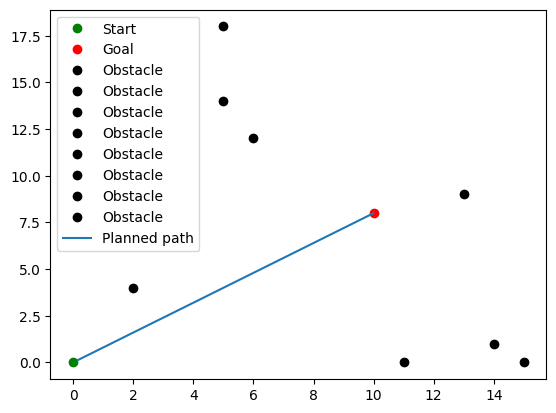

In [128]:
planned_path = apf.path
print(is_successed)
plt.figure()
plt.plot(start.deltaX, start.deltaY, 'go', label='Start')
plt.plot(goal.deltaX, goal.deltaY, 'ro', label='Goal')
for obs in obstacles:
    plt.plot(obs.deltaX, obs.deltaY, 'ko', label='Obstacle')
x_path = [pos.deltaX for pos in planned_path]
y_path = [pos.deltaY for pos in planned_path]
plt.plot(x_path, y_path, label='Planned path')
plt.legend()
plt.show()

# Multi-Agent APF

In [246]:
class Multi_Agent_APF(Improved_APF):
    def __init__(self, agents, _goal, _obstacles, _k_att, _k_rep, _rr, _step_size, _max_iters, _goal_threashold, _formation_offsets, _separation_distance):
        super().__init__(agents[0], _goal, _obstacles, _k_att, _k_rep, _rr, _step_size, _max_iters, _goal_threashold)
        self.agents = agents
        self.agent_paths = [[] for _ in self.agents]
        self.formation_offsets = _formation_offsets
        self.separation_distance = _separation_distance

    def separation(self):
        # Separation force to maintain a safe distance between agents
        separation_force = Vector2D(0, 0)
        for agent in self.agents:
            if agent != self.current_pos:  # Avoid calculating the force with itself
                r = self.current_pos - agent
                if r.length < self.separation_distance:  # Only consider agents within the separation distance
                    direction_vector = Vector2D(r.direction[0], r.direction[1])
                    # The separation force is inversely proportional to the distance
                    separation_force = separation_force - direction_vector * (self.separation_distance / r.length)
        return separation_force

    def inter_agent_attraction(self, leader_pos, offset):
        # Attractive force from the agent's target position to maintain formation
        target_pos = leader_pos + offset
        r = target_pos - self.current_pos
        direction_vector = Vector2D(r.direction[0], r.direction[1])
        return direction_vector * self.k_att * 0.1 * (r.length**2)

    def path_plan(self):
        for it in range(self.max_iters):
            # Calculate the path for the leader (the first agent in the list)
            self.current_pos = self.agents[0]
            total_force = self.attractive() + self.repulsion()
            self.current_pos = Vector2D(self.current_pos.deltaX, self.current_pos.deltaY) + Vector2D(total_force.direction[0], total_force.direction[1]) * self.step_size
            self.agents[0] = self.current_pos  # Update the position of the leader
            self.agent_paths[0].append(self.current_pos)  # Add the current position to the path of the leader

            # For all other agents, just calculate the inter-agent attraction
            for i, agent in enumerate(self.agents[1:], start=1):
                self.current_pos = agent
                total_force = self.inter_agent_attraction(self.agents[0], self.formation_offsets[i]) + self.repulsion() # Attraction to target position and repulsion from obstacles
                self.current_pos = Vector2D(self.current_pos.deltaX, self.current_pos.deltaY) + Vector2D(total_force.direction[0], total_force.direction[1]) * self.step_size
                self.agents[i] = self.current_pos
                self.agent_paths[i].append(self.current_pos)

            if self.current_pos.length < self.goal_threashold:
                return True
        return False

In [247]:
#@title Config

f_distance = 5
k_att = 2.5
k_rep = 0.8
rr = 2
step_size = 0.2
max_iters = 500
goal_threashold = 0.2
step_size_ = 2
start = Vector2D(0, 0)
goal = Vector2D(20, 5)

In [253]:
agents = [Vector2D(0, -1), Vector2D(0, 0), Vector2D(1, -1), Vector2D(1, 0)]
formation_offsets = [Vector2D(0, 0), Vector2D(0, -0.5), Vector2D(0.5, -0.5), Vector2D(0.5, 0)]
apf = Multi_Agent_APF(agents, goal, obstacles, k_att, k_rep, rr, step_size, max_iters, goal_threashold, formation_offsets, 0)

is_successed = apf.path_plan()
print(is_successed)

False


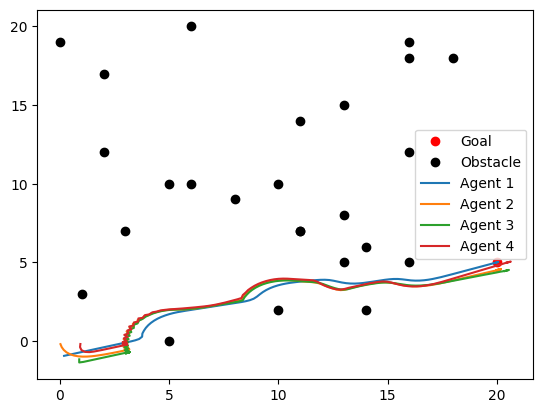

In [254]:
plt.figure()
plt.plot(goal.deltaX, goal.deltaY, 'ro', label='Goal')
for i, obs in enumerate(obstacles):
    if i == 0:
        plt.plot(obs.deltaX, obs.deltaY, 'ko', label='Obstacle')
    else:
        plt.plot(obs.deltaX, obs.deltaY, 'ko')
for i, agent_path in enumerate(apf.agent_paths):
    x_path = [pos.deltaX for pos in agent_path]
    y_path = [pos.deltaY for pos in agent_path]
    plt.plot(x_path, y_path, label=f'Agent {i+1}')
plt.legend()
plt.show()